# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas.io.json import json_normalize
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# ACCESS SPOTIFY API

In [2]:
cid ="53af5d19b4f54767af1e9c59744bbd30" 
secret = "e7c9ab58bf324c5d95e8b8e2ff6c7336"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# QUERY - Top Cities Who Listen to Artist

In [3]:
enter_artist = 'yoko ono'

results = sp.search(q='artist:' + enter_artist, type='artist')
if results['artists']['items'] == []:
    print('no match')
else:
    two_dict = results['artists']['items'][0]['external_urls']['spotify']
    about = two_dict + "/about"
print("Link to Artist Biography: " + about)

html = requests.get(about).content
soup = BeautifulSoup(html, "lxml")
soup.ul.li.span

city = [x.text.strip() for x in soup.find_all('span', attrs = {"class" : "horizontal-list__item__title"})]
city

Link to Artist Biography: https://open.spotify.com/artist/2s4tjL6W3qrblOe0raIzwJ/about


['Chicago, US',
 'Mexico City, MX',
 'New York City, US',
 'Los Angeles, US',
 'Stockholm, SE']

# QUERY - Monthly Listeners of Artist

In [4]:
listeners = (soup.find_all('h3', attrs = {"class" : "insights__column__number"})[0]).text.strip()
listeners

'1,074,357'

# QUERY - Followers of Artist

In [5]:
followers = (soup.find_all('h3', attrs = {"class" : "insights__column__number"})[1]).text.strip()
followers

'58,558'

# ...TEST LIST

In [6]:
top_artists = ['the beatles', 'dj shadow', 'david bowie', 'the cure', 'nina simone']

# LOOP - Cities

In [7]:
def get_cities(enter_artist):
    results = sp.search(q='artist:' + enter_artist, type='artist')
    if results['artists']['items'] == []:
        return
    else:
        two_dict = results['artists']['items'][0]['external_urls']['spotify']
        about = two_dict + "/about"
        html = requests.get(about).content
        soup = BeautifulSoup(html, "lxml")
        city = [x.text.strip() for x in soup.find_all('span', attrs = {"class" : "horizontal-list__item__title"})]
        return city

print(list(map(get_cities, top_artists)))

[['Mexico City, MX', 'São Paulo, BR', 'Santiago, CL', 'Chicago, US', 'Los Angeles, US'], ['Mexico City, MX', 'Los Angeles, US', 'Chicago, US', 'New York City, US', 'London, GB'], ['Mexico City, MX', 'São Paulo, BR', 'Santiago, CL', 'Paris, FR', 'Los Angeles, US'], ['Mexico City, MX', 'Santiago, CL', 'São Paulo, BR', 'Buenos Aires, AR', 'Los Angeles, US'], ['Paris, FR', 'São Paulo, BR', 'Mexico City, MX', 'London, GB', 'Madrid, ES']]


# LOOP - Listeners

In [8]:
def get_listeners(enter_artist):
    results = sp.search(q='artist:' + enter_artist, type='artist')
    if results['artists']['items'] == []:
        return
    else:
        two_dict = results['artists']['items'][0]['external_urls']['spotify']
        about = two_dict + "/about"
        html = requests.get(about).content
        soup = BeautifulSoup(html, "lxml")
    listeners = (soup.find_all('h3', attrs = {"class" : "insights__column__number"})[0]).text.strip()
    return listeners

print(list(map(get_listeners, top_artists)))

['20,558,219', '1,524,103', '12,609,061', '8,771,482', '4,671,302']


# LOOP - Followers

In [9]:
def get_followers(enter_artist):
    results = sp.search(q='artist:' + enter_artist, type='artist')
    if results['artists']['items'] == []:
        return
    else:
        two_dict = results['artists']['items'][0]['external_urls']['spotify']
        about = two_dict + "/about"
        html = requests.get(about).content
        soup = BeautifulSoup(html, "lxml")
    followers = (soup.find_all('h3', attrs = {"class" : "insights__column__number"})[1]).text.strip()
    return followers

print(list(map(get_followers, top_artists)))

['14,003,775', '343,945', '4,664,781', '2,227,529', '1,479,004']


# ------------------------------------------------------------------------------------------------------------

# PITCHFORK DATA

In [133]:
pitchfork = pd.read_csv('pitchfork.csv')
pitchfork.sort_values('genre', ascending = False)

,id,artist,content,genre,label,album,score,best_new_music,author,pub_date,year
8743,14939,the phantom band,"Phantom Band's 2009 debut, Checkmate Savage, w...",rock,chemikal underground,the wants,6.5,0,ian cohen,2011-01-06,2010
18493,5179,cass mccombs,Singer/songwriters seem like a solitary bunch....,rock,monitor,prefection,7.4,0,adam moerder,2005-01-31,2005
10498,13722,glass ghost,"The music of Glass Ghost, a Brooklyn duo assis...",rock,western vinyl,idol omen,7.7,0,brian howe,2009-11-23,2009
10500,13719,lake heartbeat,Trust in Numbers is Lake Heartbeat's inaugural...,rock,service,trust in numbers,6.9,0,zach kelly,2009-11-23,2009
18492,5179,cass mccombs,Singer/songwriters seem like a solitary bunch....,rock,4ad,prefection,7.4,0,adam moerder,2005-01-31,2005
10502,13721,the doors,"So I'm 13, and I'm slouching through Harvard S...",rock,rhino,live in new york,7.0,0,chris dahlen,2009-11-20,2009
10503,13693,snow patrol,Here's a depressing exercise: Sit down and try...,rock,interscope,up to now,5.1,0,tom breihan,2009-11-20,2009
10504,13586,grant hart,"Hüsker Dü broke up more than 20 years ago, but...",rock,con d'or,hot wax,4.2,0,joshua klein,2009-11-20,2009
10505,13706,get back guinozzi!,The debut album by Gallic pop-dub-electro hybr...,rock,fat cat,carpet madness,7.1,0,rebecca raber,2009-11-20,2009
10506,13717,them crooked vultures,There was something almost quaint about watchi...,rock,interscope,them crooked vultures,6.2,0,joe colly,2009-11-19,2009


# GENRE vs. SCORE

In [150]:
genre_score = pitchfork[["genre","score","best_new_music", "year"]]
genre_score_agg = ((genre_score.groupby('genre')).agg(['mean'])).sort_values(('best_new_music', 'mean'), ascending=False)
genre_score_agg

,score,best_new_music,year
,mean,mean,mean
genre,,,
pop/r&b,6.945943,0.076372,2008.659905
experimental,7.374098,0.075834,2007.176336
rock,7.005236,0.068946,2007.090976
rap,6.904837,0.059572,2009.897149
electronic,6.941103,0.056092,2008.052414
jazz,7.367910,0.046642,2005.621269
folk/country,7.221401,0.039490,2007.719745
global,7.368750,0.038690,2006.559524


In [151]:
genre_score = pitchfork[["genre","year"]]
genre_score.head()

,genre,year
0,electronic,1998
1,metal,2016
2,rock,2016
3,rock,2016
4,rock,2016


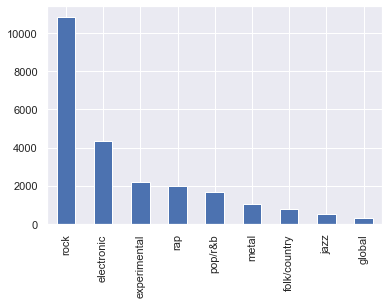

In [14]:
genre_score['genre'].value_counts().plot.bar()

In [15]:
sns.violinplot(x = "score", y = "genre", data = genre_score)

ValueError: Could not interpret input 'score'

# TOP ARITSTS - SPOTIFY INFO

In [16]:
pitchfork['best_new_music'].sum()

in_best = pitchfork[pitchfork["best_new_music"] == 1]
artists_in_best = in_best[["artist","best_new_music"]]
artists_best_count = (artists_in_best.groupby('artist').agg([sum])).sort_values(('best_new_music', 'sum'), ascending = False)
over_5 = artists_best_count[artists_best_count[("best_new_music","sum")] >= 3]
artist_list = [x for x in over_5.index]
print(artist_list)

['m83', 'kanye west', 'lcd soundsystem', 'saint etienne', 'm.i.a.', 'spiritualized', 'animal collective', 'the knife', 'the velvet underground', 'r.e.m.', 'beach house', 'jawbreaker', 'how to dress well', 'john lennon', 'ride', 'menomena', 'bikini kill', 'yoko ono', 'beastie boys', 'burial', 'miles davis', 'oneohtrix point never', 'the smashing pumpkins', 'drake', 'kendrick lamar', 'deerhunter', 'caribou', 'janelle mone', 'sufjan stevens', 'my bloody valentine', 'memory tapes', 'jay z', 'robyn', 'fleetwood mac', 'the unicorns', 'radiohead', 'the antlers', 'cut copy', 'liars', 'sunset rubdown', 'art of noise', 'david bowie', 'grandaddy', 'throbbing gristle', 'deerhoof', 'the decemberists', 'nick cave & the bad seeds', 'panda bear', 'grace jones', 'death grips', 'sunn o)))', 'david lynch', 'built to spill', 'the rapture', 'the futureheads', 'perfume genius', 'the monks', 'robert wyatt', 'fever ray', 'fka twigs', 'the avalanches', 'the books', 'the breeders', 'the clean', 'the clientele',

In [17]:
cities_list = list(map(get_cities, artist_list))
listeners_list = list(map(get_listeners, artist_list))
followers_list = list(map(get_followers, artist_list))

In [153]:
artist_info = pd.DataFrame({'Artist' : artist_list, 'Monthly Listeners' : listeners_list, 'Followers' : followers_list, 'Top Cities' : cities_list})
artist_info = artist_info.dropna()

artist_info[["Monthly Listeners", "Followers"]] = artist_info[["Monthly Listeners", "Followers"]].stack().str.replace(',','').unstack().astype('int')
#artist_info[["Monthly Listeners", "Followers"]] = artist_info[["Monthly Listeners", "Followers"]].astype('int')
artist_info.sort_values('Monthly Listeners', ascending = False).head()

,Artist,Monthly Listeners,Followers,Top Cities
23,drake,40447910,41827431,"[Chicago, US, Los Angeles, US, New York City, ..."
175,diplo,38001700,2110726,"[Mexico City, MX, Santiago, CL, Chicago, US, N..."
1,kanye west,37354764,10619888,"[Chicago, US, Los Angeles, US, New York City, ..."
134,nas,35438806,1607310,"[São Paulo, BR, Chicago, US, Los Angeles, US, ..."
95,young thug,23047571,4515606,"[Chicago, US, Los Angeles, US, New York City, ..."


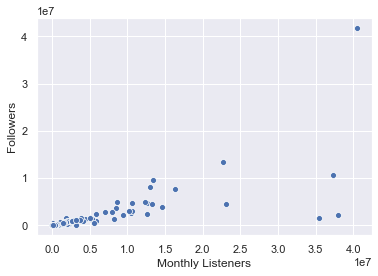

# TOP CITIES

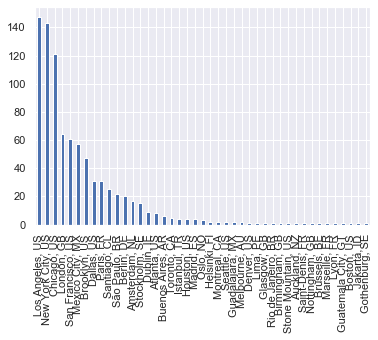

In [20]:
cities_agg = [x for x in cities_list if x != None]
cities_agg = [x for five in cities_agg for x in five] 
cities_agg = pd.DataFrame(cities_agg)
cities_agg.columns = ['City']
cities_agg['City'].value_counts().plot.bar()

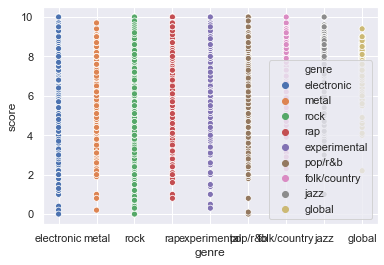

In [124]:
sns.scatterplot(x="genre", y="score", hue="genre", data=pitchfork)

# ARTIST - GENRE INDEX

In [22]:
artist_genre = pitchfork[["genre","artist","year"]]
artist_genre = artist_genre.sort_values("year", ascending = False)
#artist_sort = artist_sort.groupby(["genre", "artist"])["year"].first()
artist_genre = artist_genre.drop_duplicates(subset=['artist'])
artist_genre = artist_genre[["artist","genre"]]
artist_genre.columns = ["Artist","Genre"]
artist_genre.sort_values('Artist').head()

,Artist,Genre
1929,!!!,rock
4814,-ziq,electronic
3291,...and you will know us by the trail of dead,rock
7892,"1,2,3",jazz
6585,120 days,rock


In [23]:
artist_info.columns = ["Artist", "Monthly_Listeners", "Followers", "Top_Cities"]
artist_info.shape

(174, 4)

In [24]:
genre_sp = artist_genre.merge(artist_info, on = 'Artist') #artist_genre, left_index = True, right_index = True, how = 'outer')
genre_sp.head()

,Artist,Genre,Monthly_Listeners,Followers,Top_Cities
0,deerhoof,rock,94047,56104,"[New York City, US, Los Angeles, US, Chicago, ..."
1,death grips,experimental,577467,388597,"[Chicago, US, Los Angeles, US, New York City, ..."
2,james blake,pop/r&b,5888453,909270,"[Los Angeles, US, Chicago, US, New York City, ..."
3,radiohead,rock,10587828,4640489,"[Mexico City, MX, Santiago, CL, São Paulo, BR,..."
4,anohni,experimental,116317,85057,"[New York City, US, London, GB, Los Angeles, U..."


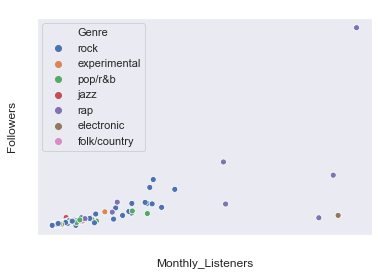

In [161]:
ax = sns.scatterplot(x="Monthly_Listeners", y="Followers", hue = 'Genre', data=genre_sp)
ax.tick_params(colors='white')
ax.grid(False)

plt.savefig('listeners_followers.png', bbox_inches = 'tight', transparent = True)

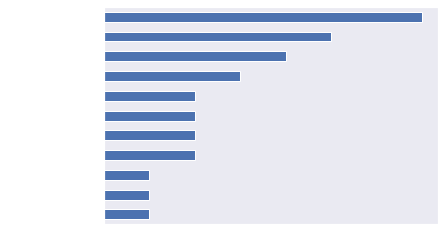

In [126]:
enter_genre = 'experimental'

x_cities = genre_sp[genre_sp["Genre"] == enter_genre]
x_cities = [x for x in x_cities['Top_Cities']]
x_cities = [x for five in x_cities for x in five if x.endswith('US') == False]
x_cities = pd.DataFrame(x_cities)
x_cities.columns = ['City']
x_cities['City'].value_counts().plot.barh()

ax = x_cities['City'].value_counts()[:30].plot.barh()  # or df.plot(), or similar
ax.invert_yaxis()
ax.tick_params(colors='white')
ax.grid(False)
#ax.title("Rock Listeners")

plt.savefig('cities_experimental_intl.png', bbox_inches = 'tight', transparent = True)

# WORD CLOUD

In [191]:
album_titles = pitchfork[["genre","album", "best_new_music", "year"]]
album_titles = album_titles[album_titles["year"] >= 2006]
album_titles = album_titles.sort_values('year', ascending = False)
album_titles = album_titles[["genre", "album"]]
album_titles = album_titles.drop_duplicates(subset = ('album', 'genre'))
album_titles.head(100)

,genre,album
11,experimental,reflection
1,metal,prelapsarian
1105,electronic,cluster 71
1114,experimental,hopelessness
1113,pop/r&b,hopelessness
1111,electronic,trgame tierra
1110,pop/r&b,trgame tierra
1109,metal,terminal redux
1108,rock,paradise
1107,rock,beloved


hsl(2668004,100%, 47%)
hsl(4475457,100%, 79%)
hsl(621655,100%, 53%)
hsl(3095543,100%, 68%)
hsl(223273,100%, 86%)
hsl(2922268,100%, 68%)
hsl(4522433,100%, 38%)
hsl(770109,100%, 96%)
hsl(3532744,100%, 79%)
hsl(9804359,100%, 46%)
hsl(5012369,100%, 39%)
hsl(882522,100%, 71%)
hsl(3001447,100%, 51%)
hsl(7341008,100%, 84%)
hsl(656742,100%, 76%)
hsl(4627336,100%, 95%)
hsl(7233164,100%, 75%)
hsl(4037988,100%, 86%)
hsl(9074432,100%, 90%)
hsl(7682302,100%, 38%)


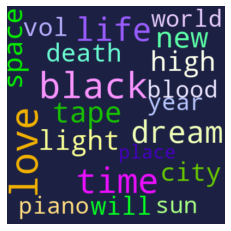

In [254]:
enter_genre = 'experimental'

import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
import re

x_titles = album_titles[album_titles["genre"] == enter_genre]
x_titles = [str(x) for x in x_titles['album']]
x_titles_str = " ".join(x_titles)
#print(x_titles_str)
#x_titles_str = x_titles_str.replace("deluxe edition"," ").replace("anniversary edition", " ").replace("ep"," ").replace("edition", " ").replace("de", " ").replace("series", " ")
replace_list = ['vol','one', 'music','song','vol','deluxe edition', 'anniversary edition', 'ep', 'edition', 'de', 'series', 'volume', 'vol','album','song', 'virgins','ii','ln', 'ath','ost']
stop_words = ['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neither', 'seemed', 'ever', 'across', 'she', 'somehow', 'be', 'we', 'full', 'never', 'sixty', 'however', 'here', 'otherwise', 'were', 'whereupon', 'nowhere', 'although', 'found', 'alone', 're', 'along', 'fifteen', 'by', 'both', 'about', 'last', 'would', 'anything', 'via', 'many', 'could', 'thence', 'put', 'against', 'keep', 'etc', 'amount', 'became', 'ltd', 'hence', 'onto', 'or', 'con', 'among', 'already', 'co', 'afterwards', 'formerly', 'within', 'seems', 'into', 'others', 'while', 'whatever', 'except', 'down', 'hers', 'everyone', 'done', 'least', 'another', 'whoever', 'moreover', 'couldnt', 'throughout', 'anyhow', 'yourself', 'three', 'from', 'her', 'few', 'together', 'top', 'there', 'due', 'been', 'next', 'anyone', 'eleven', 'much', 'call', 'therefore', 'interest', 'then', 'thru', 'themselves', 'hundred', 'was', 'sincere', 'empty', 'more', 'himself', 'elsewhere', 'mostly', 'on', 'fire', 'am', 'becoming', 'hereby', 'amongst', 'else', 'part', 'everywhere', 'too', 'herself', 'former', 'those', 'he', 'me', 'myself', 'made', 'twenty', 'these', 'bill', 'cant', 'us', 'until', 'besides', 'nevertheless', 'below', 'anywhere', 'nine', 'can', 'of', 'your', 'toward', 'my', 'something', 'and', 'whereafter', 'whenever', 'give', 'almost', 'wherever', 'is', 'describe', 'beforehand', 'herein', 'an', 'as', 'itself', 'at', 'have', 'in', 'seem', 'whence', 'ie', 'any', 'fill', 'again', 'hasnt', 'inc', 'thereby', 'thin', 'no', 'perhaps', 'latter', 'meanwhile', 'when', 'detail', 'same', 'wherein', 'beside', 'also', 'that', 'other', 'take', 'which', 'becomes', 'you', 'if', 'nobody', 'see', 'though', 'may', 'after', 'upon', 'most', 'hereupon', 'eight', 'but', 'serious', 'nothing', 'such', 'why', 'a', 'off', 'whereby', 'third', 'i', 'whole', 'noone', 'sometimes', 'well', 'amoungst', 'yours', 'their', 'rather', 'without', 'so', 'five', 'the', 'first', 'whereas', 'once']
#x_titles_str = re.sub(" ".join(map(re.escape, replace_list)), '', x_titles_str)
#x_titles_str = re.sub(replace_list," ", x_titles_str)

querywords = x_titles_str.split()
resultwords  = [word for word in querywords if word.lower() not in replace_list]
x_titles_str = ' '.join(resultwords)
#print(x_titles_str)

#WORDCLOUD
import wordcloud

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    x = ("hsl(%d,100%%, %d%%)" % (np.random.randint(0,10000000), np.random.randint(30,100)))
    print(x)
    return x


wordcloud = wordcloud.WordCloud(max_font_size = 70, max_words = 20, background_color = '#1c2143', height = 400).generate(x_titles_str)
wordcloud = wordcloud.recolor(color_func = grey_color_func)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#plt.savefig('wordcloud_experimental', bbox_inches = 'tight')



In [193]:
#BOW
x_titles = [list of phrases]
stop_words = ['deluxe edition', 'anniversary edition', 'ep', 'edition', 'de', 'series', 'volume', 'vol','album','song', 'virgins','ii','ln']
vectorizer = CountVectorizer(stop_words = stop_words)
x = vectorizer.fit_transform(x_titles)
bow = vectorizer.vocabulary_
print(bow)

{'reflection': 1296, 'hopelessness': 781, 'cluster': 335, '71': 36, 'balter': 181, 'saunier': 1365, 'the': 1583, 'ship': 1410, 'interventions': 837, 'modernists': 1034, 'bottomless': 241, 'pit': 1194, 'plays': 1204, 'music': 1053, 'of': 1104, 'twin': 1662, 'peaks': 1173, 'yyy': 1799, 'sorrow': 1467, 'reimagining': 1300, 'gorecki': 710, '3rd': 30, 'symphony': 1552, 'ears': 500, 'interview': 838, '2016': 26, 'love': 955, 'streams': 1518, 'lost': 952, 'themes': 1585, 'delusions': 430, 'grand': 715, 'fur': 667, 'bergtatt': 204, 'sleep': 1444, 'cycle': 402, 'iii': 805, 'imagining': 811, 'life': 923, 'pablo': 1143, 'become': 194, 'alive': 73, 'tower': 1629, 'meaning': 1001, 'pythagorean': 1258, 'dream': 476, 'professional': 1236, 'sunflow': 1536, 'libras': 921, 'jackie': 852, 'lynn': 969, 'magic': 973, 'its': 849, 'hard': 740, 'for': 638, 'me': 999, 'to': 1612, 'say': 1368, 'im': 808, 'sorry': 1468, 'entities': 534, 'inertias': 817, 'faint': 580, 'beings': 200, 'john': 865, 'cage': 272, 'mee

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anniversary', 'deluxe'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
virgin records